Notebook purpose: Understand SBERT and extract sentence similarity embeddings of various SBERT models to select the best model for the semantic similarity task

Author: Naomi Baes following tutorial: https://www.pinecone.io/learn/series/nlp/sentence-embeddings/ 
IDE: Visual Studio Code
Python version: 3.11.8
Environment: .conda

# Sentences

In [63]:
sentences = [
    "She has been seen at a mental_health facility since 1983 .", # cohacoca 2015-2019
    "I didn't want to believe I had any mental_health issues and went into denial .", # cohacoca 2015-2019
    "The burden of mental_illness concentrates in 5-10 of the adolescent population.", # psych 2015-2019
    "Their rates of mental_illness are almost twice that of religious adolescents raised in religious households.", # psych 2015-2019
    "Stigma against people with mental_illness is a very complex public health problem.", # psych 2015-2019
    "Stigma associated with mental_illness is one of the major impediments in evolving effective treatment interventions to address the burden associated with these disorders.", # psych 2015-2019
    "Anorexia is a killer it has the highest mortality rate of any mental_illness , including depression ." # cohacoca 2005-2009
]

In [64]:
#pip install sentence-transformers

# Load model: all-MiniLM-L6-v2

In [65]:
from sentence_transformers import SentenceTransformer

# url = sbert.net
model = SentenceTransformer('all-MiniLM-L6-v2') # initialize a sentence transformer with model name; go to sbert.net to select model
model # should have transformer model and pooling layer

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [66]:
embeddings = model.encode(sentences)
embeddings # each one represents a sentence; 678 dimensions

array([[ 2.6536558e-02,  9.9692633e-03, -2.2955146e-02, ...,
        -4.4430204e-02,  4.1934098e-03,  1.1608009e-02],
       [ 6.8381667e-02,  5.6270596e-02,  1.9821400e-02, ...,
        -1.9793548e-02, -6.0877535e-02, -5.7746540e-03],
       [ 6.7978360e-02,  4.3710589e-02, -1.7492697e-02, ...,
         3.4593757e-02,  4.0631103e-03,  5.1565319e-03],
       ...,
       [ 1.4010225e-01,  6.1761145e-02, -2.2424107e-02, ...,
        -1.2442442e-02, -1.9941617e-02,  2.4172736e-02],
       [ 4.8395887e-02,  2.9399838e-02,  3.3134013e-02, ...,
        -4.3034088e-05,  1.5402819e-02,  2.4742691e-02],
       [ 7.0450619e-02, -4.0334344e-02, -4.9871925e-02, ...,
         3.1246729e-02,  9.5653631e-02,  4.1434273e-02]], dtype=float32)

Semantic Textual Similarity (STS) - using cosine similarity function and numpy

In [67]:
import numpy as np
from sentence_transformers.util import cos_sim

# loop over all sentence embeddings we produced and compare them

# Initialize a similarity matrix
sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
  sim[i:, i] = cos_sim(embeddings[i], embeddings[i:]) # populates our similarity array

sim

array([[1.00000012, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.33233011, 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.38193712, 0.39976662, 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.35637474, 0.35237163, 0.63444644, 1.00000024, 0.        ,
        0.        , 0.        ],
       [0.4244678 , 0.46326289, 0.56310022, 0.49523413, 1.00000012,
        0.        , 0.        ],
       [0.3788653 , 0.48473001, 0.6029619 , 0.44223619, 0.75642246,
        1.        , 0.        ],
       [0.33246461, 0.32631633, 0.4352043 , 0.37503484, 0.41741908,
        0.40306342, 1.00000024]])

<Axes: >

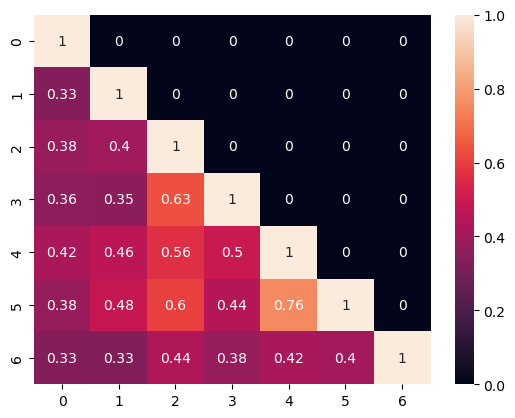

In [68]:
#!pip install matplotlib
#!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim, annot=True) # Visual array; can see that the sentence values/positions align with the sentences; most similar pair will be high cosine sim

In [69]:
sentences

['She has been seen at a mental_health facility since 1983 .',
 "I didn't want to believe I had any mental_health issues and went into denial .",
 'The burden of mental_illness concentrates in 5-10 of the adolescent population.',
 'Their rates of mental_illness are almost twice that of religious adolescents raised in religious households.',
 'Stigma against people with mental_illness is a very complex public health problem.',
 'Stigma associated with mental_illness is one of the major impediments in evolving effective treatment interventions to address the burden associated with these disorders.',
 'Anorexia is a killer it has the highest mortality rate of any mental_illness , including depression .']

# Load model: all-distilroberta-v1 

In [70]:
from sentence_transformers import SentenceTransformer

# url = sbert.net
model = SentenceTransformer('all-distilroberta-v1') # initialize a sentence transformer with model name; go to sbert.net to select model
model # should have transformer model and pooling layer

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [71]:
embeddings = model.encode(sentences)
embeddings # each one represents a sentence; 678 dimensions

array([[ 0.00395244,  0.00978314,  0.00911307, ..., -0.01554296,
         0.02363404, -0.01409375],
       [-0.01410169, -0.00484739, -0.03559161, ..., -0.00965031,
        -0.01968281, -0.00479819],
       [-0.00482951,  0.02302454, -0.03284734, ...,  0.07435264,
        -0.01001583,  0.0084028 ],
       ...,
       [ 0.00625404, -0.0046242 ,  0.00255108, ..., -0.05169593,
        -0.02139724,  0.00959193],
       [ 0.00596595,  0.02432365, -0.0105932 , ...,  0.0086915 ,
        -0.0089897 ,  0.02464906],
       [-0.02529442, -0.02497692, -0.0432545 , ...,  0.11252999,
        -0.02023237,  0.06515407]], dtype=float32)

In [72]:
embeddings.shape # check number of sentences and dimensions

(7, 768)

Semantic Textual Similarity (STS) - using cosine similarity function and numpy

In [73]:
import numpy as np
from sentence_transformers.util import cos_sim

# loop over all sentence embeddings we produced and compare them

# Initialize a similarity matrix
sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
  sim[i:, i] = cos_sim(embeddings[i], embeddings[i:]) # populates our similarity array

sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.31266892, 0.99999994, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.28315699, 0.36698055, 0.99999988, 0.        , 0.        ,
        0.        , 0.        ],
       [0.26562503, 0.2891764 , 0.61803079, 1.        , 0.        ,
        0.        , 0.        ],
       [0.40838629, 0.4600963 , 0.56413722, 0.4843204 , 1.        ,
        0.        , 0.        ],
       [0.32433492, 0.45362127, 0.67378139, 0.399928  , 0.74352133,
        0.99999988, 0.        ],
       [0.22933158, 0.3204667 , 0.52069461, 0.35208732, 0.43800336,
        0.46124783, 1.00000012]])

<Axes: >

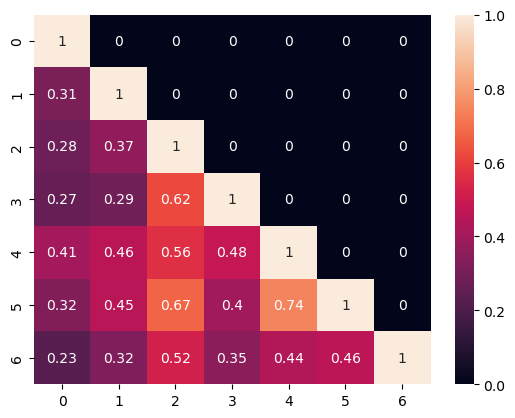

In [74]:
#!pip install matplotlib
#!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim, annot=True) # Visual array; can see that the sentence values/positions align with the sentences; most similar pair will be high cosine sim

In [75]:
sentences

['She has been seen at a mental_health facility since 1983 .',
 "I didn't want to believe I had any mental_health issues and went into denial .",
 'The burden of mental_illness concentrates in 5-10 of the adolescent population.',
 'Their rates of mental_illness are almost twice that of religious adolescents raised in religious households.',
 'Stigma against people with mental_illness is a very complex public health problem.',
 'Stigma associated with mental_illness is one of the major impediments in evolving effective treatment interventions to address the burden associated with these disorders.',
 'Anorexia is a killer it has the highest mortality rate of any mental_illness , including depression .']

# Load all-mpnet-base-v2 model

In [76]:
from sentence_transformers import SentenceTransformer

# model url: https://huggingface.co/sentence-transformers/all-mpnet-base-v2
# model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2') # max seq length = 3x as long; additional normalization function

model = SentenceTransformer("all-mpnet-base-v2")
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [77]:
embeddings = model.encode(sentences)
embeddings # each one represents a sentence; 768 dimensions

array([[ 0.02347014,  0.08728902, -0.00282084, ..., -0.02183038,
        -0.05020836,  0.01668234],
       [-0.01152247,  0.04449909, -0.01032269, ..., -0.02604869,
        -0.02293562, -0.00034413],
       [ 0.03385311, -0.00410318,  0.01448071, ..., -0.04863239,
        -0.00865368, -0.03407342],
       ...,
       [ 0.00308681,  0.04524866, -0.00750326, ..., -0.01890598,
        -0.03457134,  0.0174574 ],
       [ 0.02491228,  0.02617718,  0.0127308 , ..., -0.03505536,
        -0.04510719,  0.00398587],
       [ 0.04807976,  0.06500247,  0.03684443, ..., -0.0619013 ,
        -0.05130813, -0.01422677]], dtype=float32)

In [78]:
embeddings.shape # check number of sentences and dimensions

(7, 768)

In [79]:
import numpy as np
from sentence_transformers.util import cos_sim

# loop over all sentence embeddings we produced and compare them to
# Initialize a similarity matrix
sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
  sim[i:, i] = cos_sim(embeddings[i], embeddings[i:]) # populates our similarity array

sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.29678917, 1.00000012, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.219675  , 0.39833292, 0.99999988, 0.        , 0.        ,
        0.        , 0.        ],
       [0.19783498, 0.27636078, 0.52739155, 1.        , 0.        ,
        0.        , 0.        ],
       [0.30066764, 0.47818935, 0.50661504, 0.44697571, 1.00000024,
        0.        , 0.        ],
       [0.29358912, 0.49549434, 0.54512751, 0.36615971, 0.82374036,
        1.00000012, 0.        ],
       [0.15024352, 0.32700288, 0.45583078, 0.31774992, 0.42526901,
        0.43027142, 1.        ]])

<Axes: >

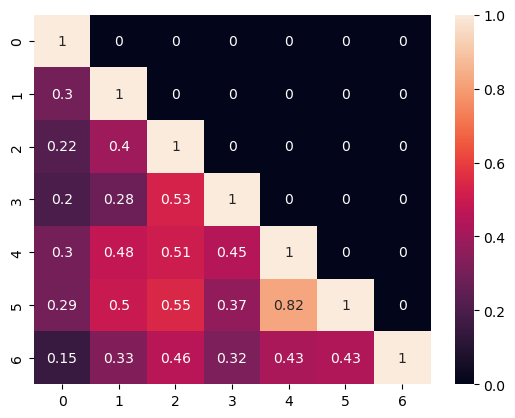

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim, annot=True) # Visual array; can see that the sentence values/positions align with the sentences; most similar pair will be high cosine sim

In [81]:
sentences

['She has been seen at a mental_health facility since 1983 .',
 "I didn't want to believe I had any mental_health issues and went into denial .",
 'The burden of mental_illness concentrates in 5-10 of the adolescent population.',
 'Their rates of mental_illness are almost twice that of religious adolescents raised in religious households.',
 'Stigma against people with mental_illness is a very complex public health problem.',
 'Stigma associated with mental_illness is one of the major impediments in evolving effective treatment interventions to address the burden associated with these disorders.',
 'Anorexia is a killer it has the highest mortality rate of any mental_illness , including depression .']

# Test #2 with the preferred model

In [82]:
sentences = [
"A dog was chasing the boy",
"The boy was chased by a dog",
"A cat was chasing the boy",
"chasing was dog a boy the",
"Anorexia is a killer as it has the highest mortality rate",
]

sentences

['A dog was chasing the boy',
 'The boy was chased by a dog',
 'A cat was chasing the boy',
 'chasing was dog a boy the',
 'Anorexia is a killer as it has the highest mortality rate']

In [83]:
embeddings = model.encode(sentences)
#embeddings # each one represents a sentence; 768 dimensions

import numpy as np
from sentence_transformers.util import cos_sim

# loop over all sentence embeddings we produced and compare them to
# Initialize a similarity matrix
sim = np.zeros((len(sentences), len(sentences)))

for i in range(len(sentences)):
  sim[i:, i] = cos_sim(embeddings[i], embeddings[i:]) # populates our similarity array

sim

array([[ 1.00000012e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 9.34279680e-01,  9.99999881e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.81402802e-01,  6.23298824e-01,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 8.22268486e-01,  8.19023013e-01,  5.17928600e-01,
         1.00000000e+00,  0.00000000e+00],
       [-3.57592665e-03,  6.36979938e-04, -8.69250949e-03,
         1.38728227e-02,  1.00000024e+00]])

<Axes: >

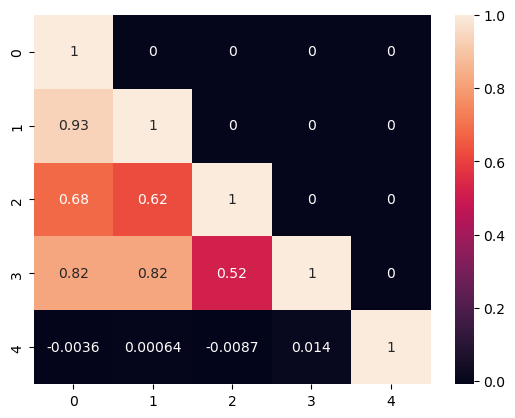

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sim, annot=True) # Visual array; can see that the sentence values/positions align with the sentences; most similar pair will be high cosine sim

Analysis: //
1+0=0.93: similar as expected despite syntax re-ordering //
    The boy was chased by a dog //
    A dog was chasing the boy //
2+0=0.68: picks up on the fact that the focus is the "cat/dog" despite similar syntax organisation //
    A cat was chasing the boy //
    A dog was chasing the boy //
2+1=0.62: picks up on the fact that the focus is the "cat/dog" is doing the chasing //
    A cat was chasing the boy //
    The boy was chased by a dog //
3+0=0.82: WEIRD because the similarity score is 82% despite nonsensical sentence structure, so I am not sure what to make of it (?) //
    chasing was dog a boy the //
    A dog was chasing the boy //
3+1=0.82: WEIRD because the similarity score is 82% despite nonsensical sentence structure, so I am not sure what to make of it (?) Maybe this is a good thing as it demonstrates the focus on semantics (even if it is only for a bag of words approach)? //
    chasing was dog a boy the //
    The boy was chased by a dog //
3+2=0.52: Picks up on the cat/dog focus //
    chasing was dog a boy the //
    A cat was chasing the boy //
4+0-3=dissimilar to the other sentences as would be expected //
    Anorexia is a killer as it has the highest mortality rate //